In [1]:
#import differents libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#from sklearn.metrics import confusionmatixc

In [2]:
raw_data = pd.read_csv('insurance2.csv')

In [3]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
raw_data.shape

(1338, 8)

In [5]:
raw_data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
#Find the correlation of every pair of features (and the outcome variable).
raw_data.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


<AxesSubplot:>

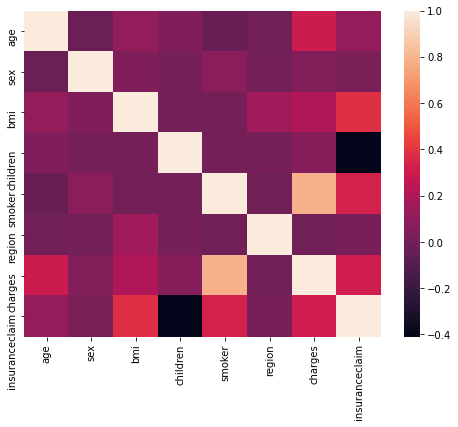

In [7]:
#visualize the correlation with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(raw_data.corr())

In [8]:
user_features = ['age','sex','bmi','children','smoker','region','charges']


In [9]:
#split the data with 1000 for training, 300 for testing and 38 for cross check
train_data = raw_data[:1000]
test_data = raw_data[1000:1300]
crosscheck = raw_data[1300:]

X_train = train_data[user_features]
y_train = train_data['insuranceclaim']
#y_train

X_test = test_data[user_features]
y_test = test_data['insuranceclaim']


### Normalize the inputs.

In [10]:
#Normalize the data such that each variable has 0 mean and standard deviation of 1.
mean = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)

X_train = (X_train - mean)/stds
X_test = (X_test - mean)/stds
#y_train

In [11]:
X_train.isnull().sum()
y_train.isnull().sum()

0

In [12]:
lg = LogisticRegression()

In [13]:
lg.fit(X_train,y_train)

LogisticRegression()

In [15]:
#find out the accuracy of the model.
accuracy = lg.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  86.0 %


### Visualize how the model uses the different features and which features have a greater effect

In [32]:
#get the coefficient of each feature
lg.coef_[0]
coeff = list(lg.coef_[0])
coeff

#get the features name
labels = list(train_data.drop('insuranceclaim',1).columns)
labels

features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features

,Features,importance
3,children,-1.829939
5,region,-0.053891
1,sex,0.034451
6,charges,0.176800
0,age,0.380019
4,smoker,1.564069
2,bmi,1.621075


Text(0.5, 0, 'Importance')

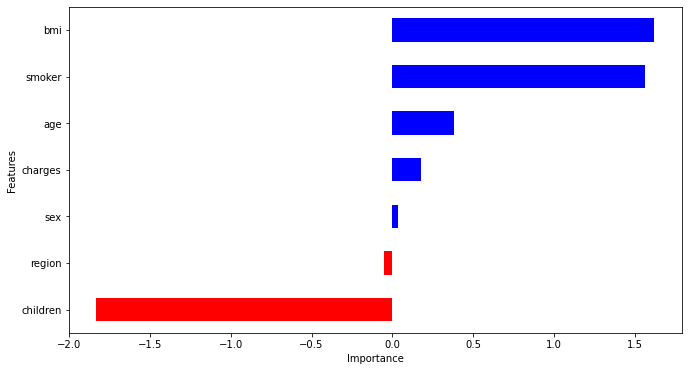

In [33]:
#plot the importance of each features
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

### BMI, Smoker have significant influence on the model, specially BMI.

### Children has a negative influence on the prediction, i.e. higher number children / dependents are correlated with a policyholder not taken insurance claim.